In [5]:
!pip install fastkml  

  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Installing backend dependencies: started
  Installing backend dependencies: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
   ---------------------------------------- 0.0/62.7 kB ? eta -:--:--
   ---------------------------------------- 62.7/62.7 kB 3.5 MB/s eta 0:00:00
  Created wheel for pygeoif: filename=pygeoif-0.7-py3-none-any.whl size=19061 sha256=0a3df45639feee7bf68cf18c6d57cb2c855afc654c6b3c977d775cf7176132f3
  Stored in directory: c:\users\keert\appdata\local\pip\cache\wheels\29\5d\36\1b1920da58115387fa9073ce7af4fb9094fb72e11a31192603
Successfully built pygeoif


In [15]:
import pandas as pd
import fastkml 
import matplotlib.pyplot as plt


In [40]:
import xml.etree.ElementTree as ET
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.fftpack import fft, fftfreq


In [36]:
#Washington's freight corridor data
import xml.etree.ElementTree as ET
import pandas as pd
import matplotlib.pyplot as plt

def read_kml(file_path):
    tree = ET.parse(file_path)
    root = tree.getroot()
    ns = {'kml': 'http://www.opengis.net/kml/2.2'}

    data = []
    placemarks = root.findall('.//kml:Placemark', namespaces=ns)
    for placemark in placemarks:
        placemark_data = {}
        schema_data = placemark.find('.//kml:SchemaData', namespaces=ns)
        if schema_data is not None:
            for simple_data in schema_data.findall('.//kml:SimpleData', namespaces=ns):
                key = simple_data.get('name')
                value = simple_data.text
                placemark_data[key] = value
        data.append(placemark_data)

    return pd.DataFrame(data)

# Read the KML file
df = read_kml("C:\\Users\\keert\\Downloads\\WSDOT_-_Freight_Data_Truck_Freight_Economic_Corridors.kml")

# Convert data types
df['OBJECTID'] = pd.to_numeric(df['OBJECTID'], errors='coerce')
df['BeginAccumulatedRouteMile'] = pd.to_numeric(df['BeginAccumulatedRouteMile'], errors='coerce')
df['EndAccumulatedRouteMile'] = pd.to_numeric(df['EndAccumulatedRouteMile'], errors='coerce')
df['Length'] = pd.to_numeric(df['Length'], errors='coerce')
df['BeginMilepost'] = pd.to_numeric(df['BeginMilepost'], errors='coerce')
df['EndMilepost'] = pd.to_numeric(df['EndMilepost'], errors='coerce')
df['SHAPESTLength'] = pd.to_numeric(df['SHAPESTLength'], errors='coerce')
df['PublishDate'] = pd.to_datetime(df['PublishDate'], errors='coerce')

# Display the first few rows and info
print(df.head())
print("\nData Info:")
print(df.info())














   OBJECTID  BeginAccumulatedRouteMile  EndAccumulatedRouteMile     Length  \
0         1                 167.139999               180.660004  13.520001   
1         2                   1.790000                 4.910000   3.120000   
2         3                  13.890000                18.320000   4.430000   
3         4                   8.670000                14.470000   5.800000   
4         5                   4.490000                 4.920000   0.430000   

  FGTSClass Direction CountyName  BeginMilepost  EndMilepost  \
0       T-2         i     Benton         167.25   180.770004   
1       T-2         i       King           1.79     4.640000   
2       T-2         i     Benton          13.89    18.320000   
3       T-2         i  Jefferson           8.87    14.670000   
4       T-2         i     Skagit           4.49     4.920000   

    EconomicCorridorType  ... Ownership  \
0  T-2 freight corridors  ...     WSDOT   
1  T-2 freight corridors  ...     WSDOT   
2  T-2 freight co

In [32]:
# Convert data types
df['OBJECTID'] = pd.to_numeric(df['OBJECTID'], errors='coerce')
df['BeginAccumulatedRouteMile'] = pd.to_numeric(df['BeginAccumulatedRouteMile'], errors='coerce')
df['EndAccumulatedRouteMile'] = pd.to_numeric(df['EndAccumulatedRouteMile'], errors='coerce')
df['Length'] = pd.to_numeric(df['Length'], errors='coerce')
df['BeginMilepost'] = pd.to_numeric(df['BeginMilepost'], errors='coerce')
df['EndMilepost'] = pd.to_numeric(df['EndMilepost'], errors='coerce')
df['SHAPESTLength'] = pd.to_numeric(df['SHAPESTLength'], errors='coerce')
df['PublishDate'] = pd.to_datetime(df['PublishDate'], errors='coerce')

In [33]:
# Temporal analysis (but it seems all dates are the same)
#Checking for Valid Dates and Extracting Years
if not df['PublishDate'].isna().all():
    df['Year'] = df['PublishDate'].dt.year
    print("\nUnique years in the data:", df['Year'].unique())
else:
    print("\nNo valid dates found. Temporal analysis may not be possible.")

# Analyze freight corridors by type
corridor_type_counts = df['EconomicCorridorType'].value_counts()
print("\nFreight Corridors by Type:")
print(corridor_type_counts)


Unique years in the data: [2021]

Freight Corridors by Type:
EconomicCorridorType
T-2 freight corridors                                  2226
First/Last Mile Connector Routes to T1/T2 Corridors     809
T-1 freight corridors                                   471
Alternative Freight Routes                               62
Name: count, dtype: int64


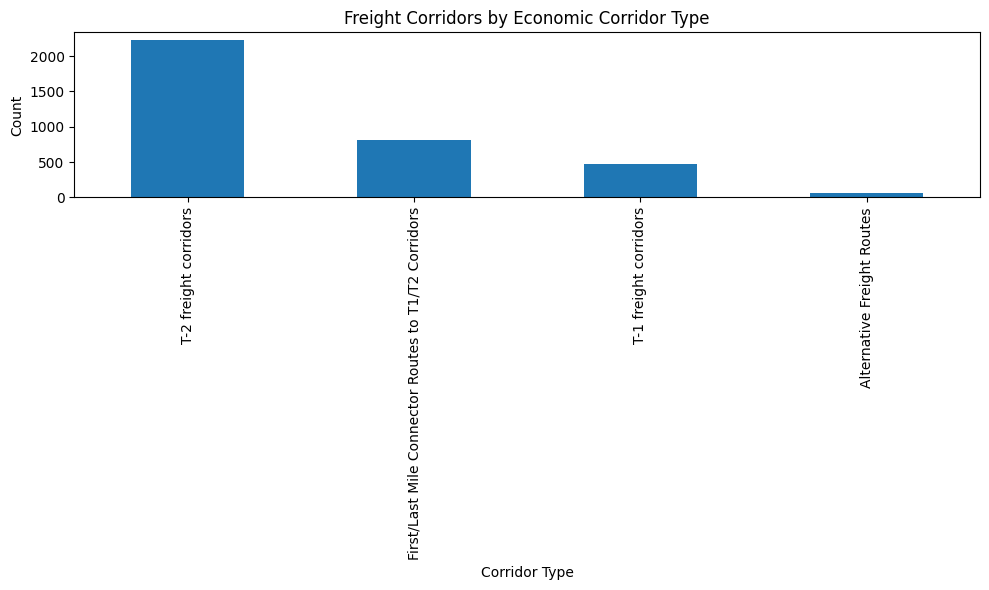

In [34]:
#to visualize the count of freight corridors by their economic corridor types.
plt.figure(figsize=(10, 6))
corridor_type_counts.plot(kind='bar')
plt.title('Freight Corridors by Economic Corridor Type')
plt.xlabel('Corridor Type')
plt.ylabel('Count')
plt.tight_layout()
plt.show()


In [24]:
# Analyze total length by corridor type
total_length_by_type = df.groupby('EconomicCorridorType')['Length'].sum()
print("\nTotal Length by Corridor Type:")
print(total_length_by_type)


Total Length by Corridor Type:
EconomicCorridorType
Alternative Freight Routes                              970.529998
First/Last Mile Connector Routes to T1/T2 Corridors     820.580000
T-1 freight corridors                                  2212.819993
T-2 freight corridors                                  2991.150006
Name: Length, dtype: float64


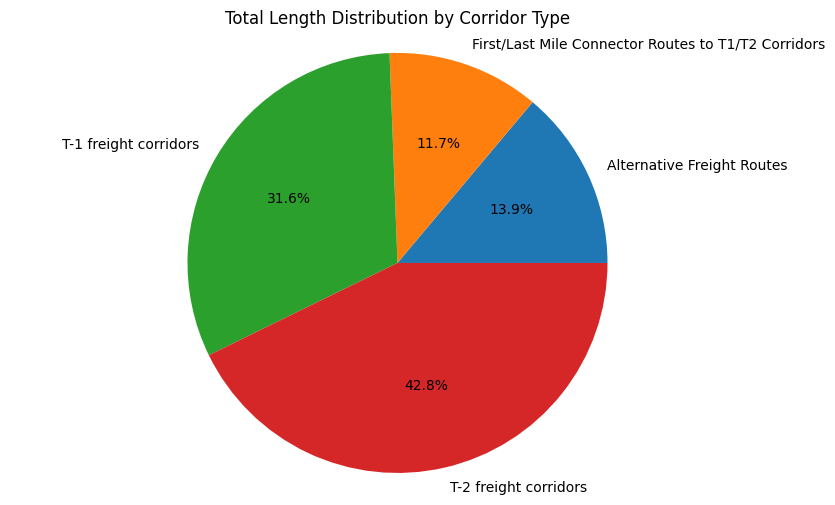

In [25]:
#This code creates a pie chart to visualize the distribution of total length among different corridor types
plt.figure(figsize=(10, 6))
plt.pie(total_length_by_type, labels=total_length_by_type.index, autopct='%1.1f%%')
plt.title('Total Length Distribution by Corridor Type')
plt.axis('equal')
plt.show()


In [26]:
# Top counties by total freight corridor length
county_lengths = df.groupby('CountyName')['Length'].sum().sort_values(ascending=False)
top_counties = county_lengths.head(10)
print("\nTop 10 Counties by Total Freight Corridor Length:")
print(top_counties)



Top 10 Counties by Total Freight Corridor Length:
CountyName
King         833.359999
Pierce       491.840000
Yakima       458.459998
Spokane      455.409999
Grant        397.740005
Snohomish    375.529999
Benton       355.210002
Adams        281.959998
Lewis        280.209999
Kittitas     270.729993
Name: Length, dtype: float64


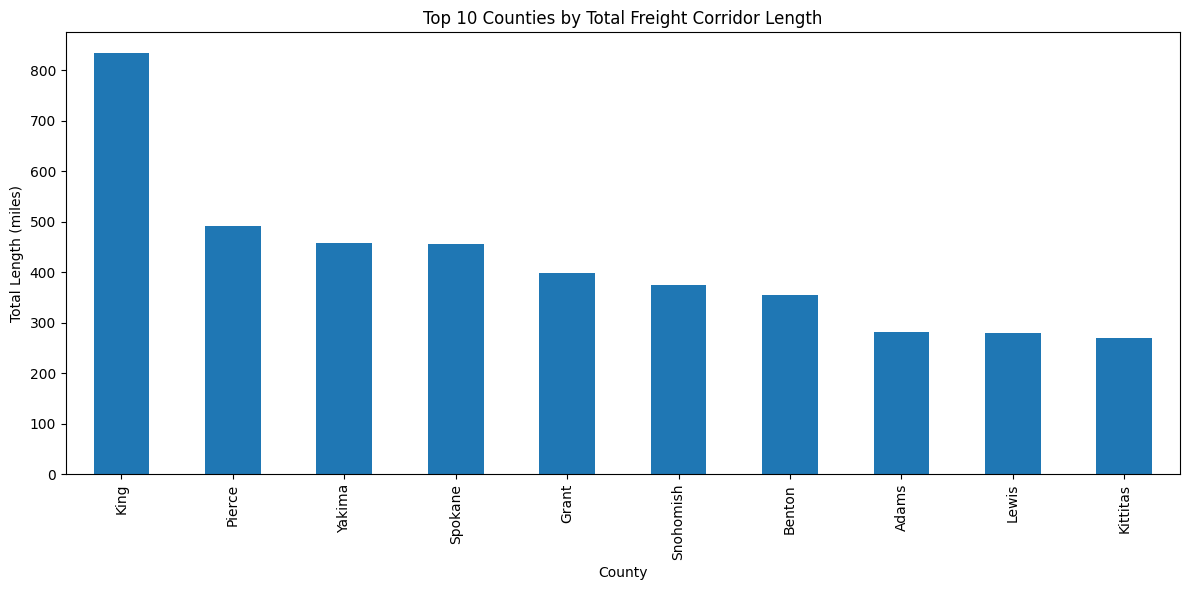

In [27]:
#bar chart to visually represent the total freight corridor length for the top 10 counties
plt.figure(figsize=(12, 6))
top_counties.plot(kind='bar')
plt.title('Top 10 Counties by Total Freight Corridor Length')
plt.xlabel('County')
plt.ylabel('Total Length (miles)')
plt.tight_layout()
plt.show()

In [28]:
# Analyze freight class distribution
fgts_class_counts = df['FGTSClass'].value_counts()
print("\nFGTS Class Distribution:")
print(fgts_class_counts)


FGTS Class Distribution:
FGTSClass
T-2      2226
T-3       745
T-1       471
Non-T     246
T-4        12
T-5         6
Non T       5
Name: count, dtype: int64


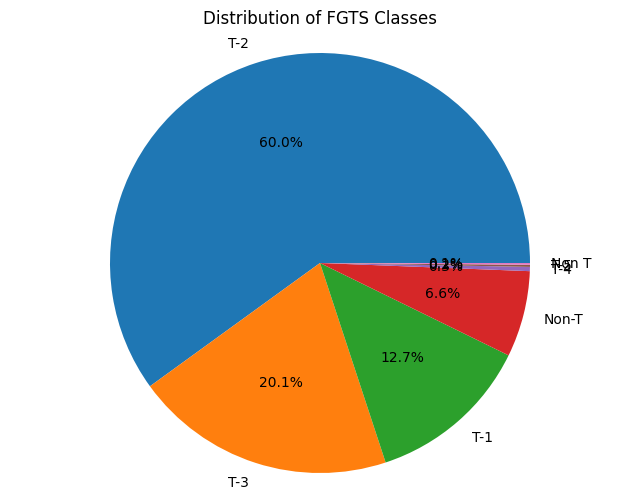

In [29]:
#creates a pie chart to visually represent the distribution of FGTS (Freight and Goods Transportation System) classes
plt.figure(figsize=(8, 6))
plt.pie(fgts_class_counts, labels=fgts_class_counts.index, autopct='%1.1f%%')
plt.title('Distribution of FGTS Classes')
plt.axis('equal')
plt.show()

In [37]:
#Fourier Analysis in temporial analysis
# Convert data types
df['BeginAccumulatedRouteMile'] = pd.to_numeric(df['BeginAccumulatedRouteMile'], errors='coerce')
df['Length'] = pd.to_numeric(df['Length'], errors='coerce')
df['EconomicCorridorType'] = df['EconomicCorridorType'].fillna('Unknown')

In [38]:
# Sort by BeginAccumulatedRouteMile to get a spatial 'signal'
df_sorted = df.sort_values('BeginAccumulatedRouteMile').dropna(subset=['BeginAccumulatedRouteMile', 'Length'])

In [42]:
# Prepare data for FFT
x = df_sorted['BeginAccumulatedRouteMile'].values
y = df_sorted['Length'].values

# Interpolate to get evenly spaced data (required for FFT)
x_interp = np.linspace(x.min(), x.max(), len(x))
y_interp = np.interp(x_interp, x, y)

# Perform FFT
yf = fft(y_interp)
xf = fftfreq(len(x_interp), (x_interp[1]-x_interp[0]))

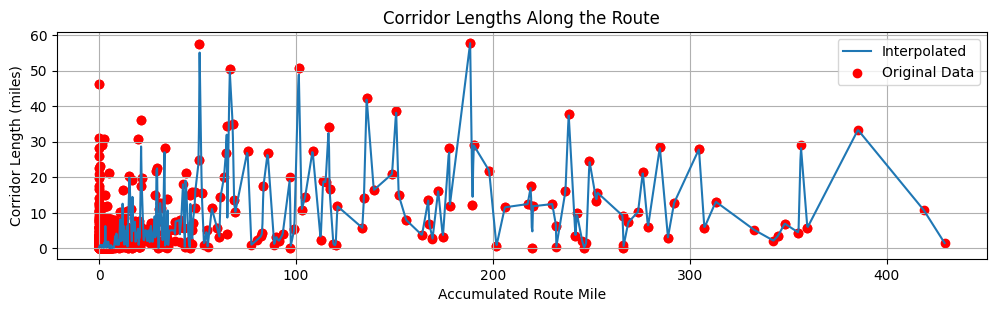

In [43]:
# Plot the original 'signal' (corridor lengths along the route)
plt.figure(figsize=(12, 10))
plt.subplot(3, 1, 1)
plt.plot(x_interp, y_interp, label='Interpolated')
plt.scatter(x, y, color='red', label='Original Data')
plt.title('Corridor Lengths Along the Route')
plt.xlabel('Accumulated Route Mile')
plt.ylabel('Corridor Length (miles)')
plt.legend()
plt.grid(True)

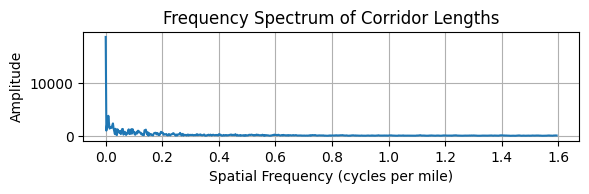

In [44]:
# Plot the frequency spectrum
plt.subplot(3, 1, 2)
plt.plot(xf[:len(xf)//2], np.abs(yf[:len(yf)//2]))
plt.title('Frequency Spectrum of Corridor Lengths')
plt.xlabel('Spatial Frequency (cycles per mile)')
plt.ylabel('Amplitude')
plt.grid(True)

In [45]:
# Identify and filter significant frequencies
threshold = 0.1 * np.max(np.abs(yf))
significant_freq = xf[:len(xf)//2][np.abs(yf[:len(yf)//2]) > threshold]

print("\nSignificant Spatial Frequencies (cycles per mile):")
print(significant_freq)



Significant Spatial Frequencies (cycles per mile):
[0.         0.00465427 0.00930854 0.01163567 0.02327135 0.02559848]


In [46]:
# Reconstruct the signal with significant frequencies
yf_filtered = yf.copy()
yf_filtered[np.abs(yf) <= threshold] = 0
y_filtered = np.fft.ifft(yf_filtered).real

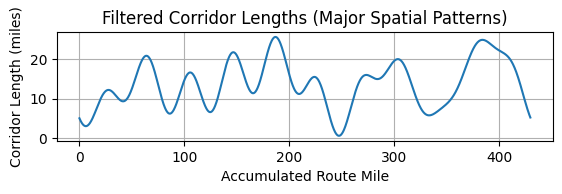

In [47]:
# Plot the filtered 'signal'
plt.subplot(3, 1, 3)
plt.plot(x_interp, y_filtered)
plt.title('Filtered Corridor Lengths (Major Spatial Patterns)')
plt.xlabel('Accumulated Route Mile')
plt.ylabel('Corridor Length (miles)')
plt.grid(True)

In [48]:
plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>

In [49]:
# Analyze patterns by corridor type
for corridor_type in df['EconomicCorridorType'].unique():
    df_type = df[df['EconomicCorridorType'] == corridor_type].sort_values('BeginAccumulatedRouteMile')
    
    x = df_type['BeginAccumulatedRouteMile'].values
    y = df_type['Length'].values
    
    if len(x) < 2:  # Skip if not enough data points
        continue
    
    x_interp = np.linspace(x.min(), x.max(), len(x))
    y_interp = np.interp(x_interp, x, y)
    
    yf = fft(y_interp)
    xf = fftfreq(len(x_interp), (x_interp[1]-x_interp[0]))

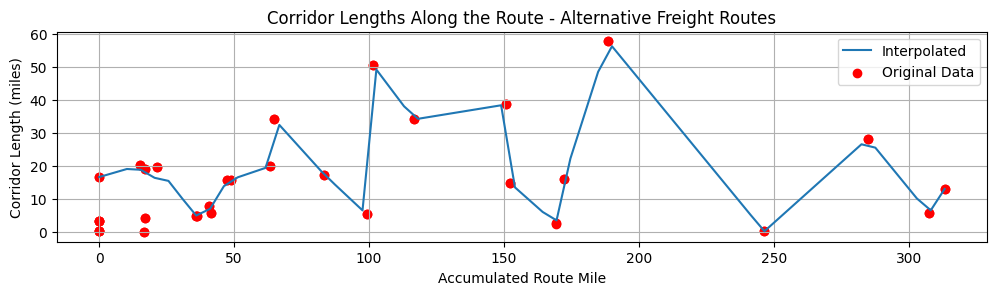

In [51]:
plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
plt.plot(x_interp, y_interp, label='Interpolated')
plt.scatter(x, y, color='red', label='Original Data')
plt.title(f'Corridor Lengths Along the Route - {corridor_type}')
plt.xlabel('Accumulated Route Mile')
plt.ylabel('Corridor Length (miles)')
plt.legend()
plt.grid(True)

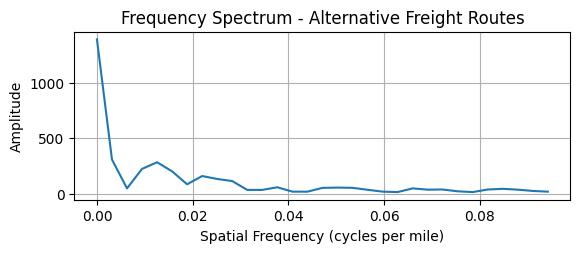

In [52]:
plt.subplot(2, 1, 2)
plt.plot(xf[:len(xf)//2], np.abs(yf[:len(yf)//2]))
plt.title(f'Frequency Spectrum - {corridor_type}')
plt.xlabel('Spatial Frequency (cycles per mile)')
plt.ylabel('Amplitude')
plt.grid(True)
    

In [53]:
plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\keert\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\keert\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


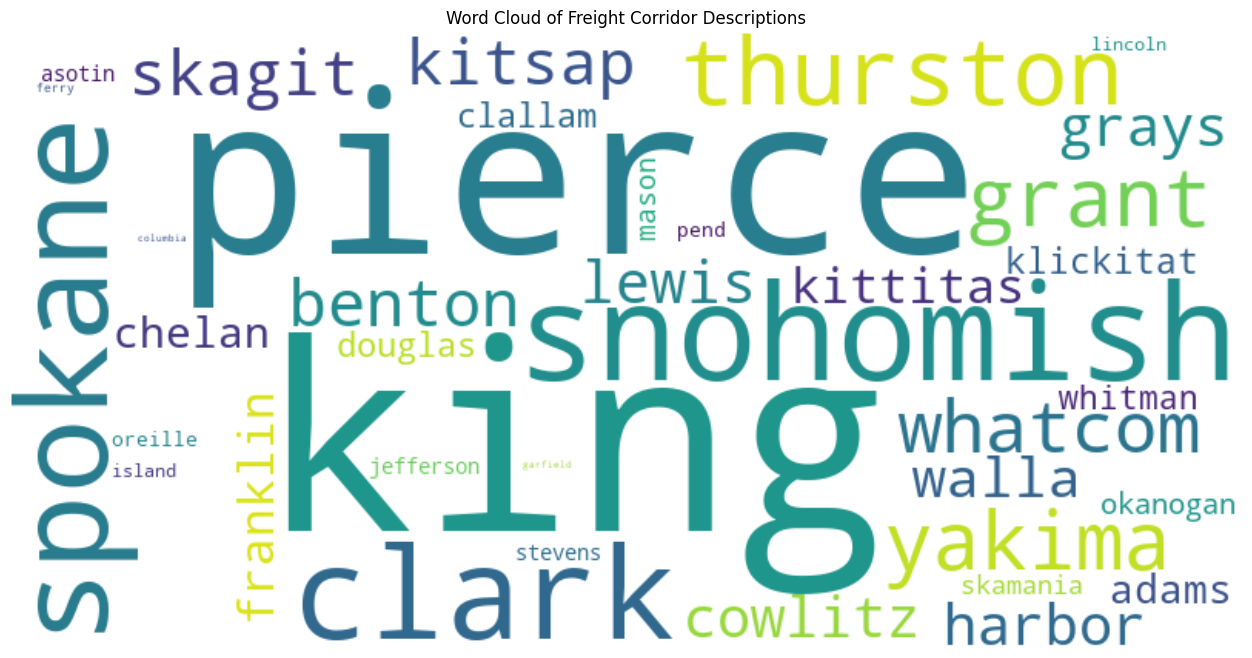

In [58]:
import xml.etree.ElementTree as ET
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from collections import Counter

def read_kml(file_path):
    tree = ET.parse(file_path)
    root = tree.getroot()
    ns = {'kml': 'http://www.opengis.net/kml/2.2'}

    data = []
    placemarks = root.findall('.//kml:Placemark', namespaces=ns)
    for placemark in placemarks:
        placemark_data = {}
        schema_data = placemark.find('.//kml:SchemaData', namespaces=ns)
        if schema_data is not None:
            for simple_data in schema_data.findall('.//kml:SimpleData', namespaces=ns):
                key = simple_data.get('name')
                value = simple_data.text
                placemark_data[key] = value
        data.append(placemark_data)

    return pd.DataFrame(data)

# Read the KML file
df = read_kml("C:\\Users\\keert\\Downloads\\WSDOT_-_Freight_Data_Truck_Freight_Economic_Corridors.kml")

# Combine all descriptions into a single text
all_descriptions = ' '.join(df['CountyName'].dropna())

# Process the text
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# Download NLTK stopwords (run this once)
import nltk
nltk.download('stopwords')
nltk.download('punkt')

# Get stopwords
stop_words = set(stopwords.words('english'))

# Additional stopwords specific to this domain
additional_stopwords = {'to', 'line', 'co', 'st', 'rd', 'ave', 'blvd'}
stop_words.update(additional_stopwords)

# Tokenize and clean the text
tokens = word_tokenize(all_descriptions.lower())
cleaned_tokens = [token for token in tokens if token.isalnum() and token not in stop_words]

# Count word frequencies
word_freq = Counter(cleaned_tokens)

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_freq)

# Display the word cloud
plt.figure(figsize=(16, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Freight Corridor Descriptions')
plt.show()

